<a href="https://colab.research.google.com/github/hackayan/ANN_psychophysics/blob/master/model_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def simulate_M1random_v1(T, mu, b):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)

    for t in range(T):
        # compute choice probabilities
        p = [b, 1 - b]

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

    return a, r


In [ ]:
simulate_M1random_v1(100, [25,0],0.31)

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
 array([False, False, False,  True, False, False, False, False, False,
         True, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False,  True,
        False, False,  True, False,  True, False,  True, False, False,
        False,  True, False,  True, False, False, False, False, False,
        False,  True, False, False, False, False, False,  True, False,
         True, False, False, False, False, False, False,  True, False,
        False, Fals

In [ ]:
import numpy as np

def simulate_M2WSLS_v1(T, mu, epsilon):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)

    # last reward/action (initialize as nan)
    rLast = np.nan
    aLast = np.nan

    for t in range(T):
        # compute choice probabilities
        if np.isnan(rLast):
            # first trial choose randomly
            p = [0.5, 0.5]
        else:
            # choice depends on last reward
            if rLast == 1:
                # win stay (with probability 1-epsilon)
                p = [epsilon/2, epsilon/2]
                p[aLast] = 1 - epsilon/2
            else:
                # lose shift (with probability 1-epsilon)
                p = [(1-epsilon/2), (1-epsilon/2)]
                p[aLast] = epsilon/2

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

        aLast = a[t]
        rLast = r[t]

    return a, r


In [ ]:
simulate_M2WSLS_v1(100,[25,0],0.1)

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  Tru

In [ ]:
import numpy as np

def simulate_M3RescorlaWagner_v1(T, mu, alpha, beta):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)
    Q = np.array([0.5, 0.5])

    for t in range(T):
        # compute choice probabilities
        p = np.exp(beta * Q) / np.sum(np.exp(beta * Q))

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] = Q[a[t]] + alpha * delta

    return a, r


In [ ]:
simulate_M3RescorlaWagner_v1(100, [25,0],0.1, 0.3)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True, False, False,  True, False,  True,  True,
         True, False, False,  True,  True, False, False, False,  True,
         True,  True, False,  True, False,  True,  True, False,  True,
         True, False,  True, False, False, False,  True,  True, False,
         True,  True, False,  True, False, False, False, False, False,
        False, False,  True,  True, False,  True,  True, False,  True,
         True,  True,  True, False, False, False,  True, False, False,
        False,  True,  True,  True, False,  True, False, False, False,
        False,  Tru

In [ ]:
import numpy as np

def simulate_M4ChoiceKernel_v1(T, mu, alpha_c, beta_c):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)
    CK = np.array([0, 0])

    for t in range(T):
        # compute choice probabilities
        p = np.exp(beta_c * CK) / np.sum(np.exp(beta_c * CK))

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

        # update choice kernel
        CK = (1 - alpha_c) * CK
        CK[a[t]] = CK[a[t]] + alpha_c * 1

    return a, r


In [ ]:
simulate_M4ChoiceKernel_v1(100, [25,0], 0.01,0.5)

(array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]),
 array([ True, False, False,  True,  True, False,  True,  True, False,
        False,  True, False, False,  True, False,  True,  True,  True,
         True, False, False, False, False, False,  True, False,  True,
        False, False,  True,  True, False,  True,  True,  True, False,
         True,  True, False, False, False,  True, False,  True,  True,
         True, False,  True, False,  True, False, False, False,  True,
         True,  True, False,  True,  True, False,  True,  True, False,
         True,  True, False, False,  True, False,  True, False, False,
        False,  True,  True, False,  True, False,  True,  True, False,
         True, Fals

In [ ]:
import numpy as np

def simulate_M5RWCK_v1(T, mu, alpha, beta, alpha_c, beta_c):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)
    Q = np.array([0.5, 0.5])
    CK = np.array([0, 0])

    for t in range(T):
        # compute choice probabilities
        V = beta * Q + beta_c * CK
        p = np.exp(V) / np.sum(np.exp(V))

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] = Q[a[t]] + alpha * delta

        # update choice kernel
        CK = (1 - alpha_c) * CK
        CK[a[t]] = CK[a[t]] + alpha_c * 1

    return a, r


In [ ]:
simulate_M5RWCK_v1(100, [25,0], 0.1,0.3, 0.01,0.5)

(array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([False, False, False, False,  True, False,  True, False,  True,
        False,  True, False,  True, False, False,  True, False, False,
         True,  True,  True, False,  True, False, False,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True, False,  True,  True, False,
        False, False, False,  True,  True, False,  True,  True,  True,
         True,  True, False, False, False, False,  True,  True, False,
        False,  True,  True,  True,  True,  True, False, False, False,
         True, False,  True,  True, False,  True,  True,  True, False,
        False, Fals

In [ ]:
import numpy as np

def simulate_M6RescorlaWagnerBias_v1(T, mu, alpha, beta, Qbias):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=bool)
    Q = np.array([0.5, 0.5])

    for t in range(T):
        # compute choice probabilities
        V = Q.copy()
        V[0] = V[0] + Qbias
        p = np.exp(beta * V) / np.sum(np.exp(beta * V))

        # make choice according to choice probabilities
        a[t] = np.random.choice([0, 1], p=p)

        # generate reward based on choice
        r[t] = np.random.rand() < mu[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] = Q[a[t]] + alpha * delta

    return a, r


In [ ]:
simulate_M6RescorlaWagnerBias_v1(100,[25,0], 0.1, 0.03,-10)

(array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]),
 array([False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False, False,  True,  True,
         True, False,  True, False,  True,  True,  True, False, False,
         True,  True, False, False,  True,  True, False,  True, False,
        False, False, False,  True, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False,  True,
         True,  True,  True, False, False, False, False, False, False,
         True, False, False,  True, False, False, False,  True,  True,
         True, False,  True,  True, False, False,  True,  True,  True,
         True, Fals

In [ ]:
import numpy as np

def simulate_fullRL_v1(alpha, beta, T):
    a = np.zeros(T, dtype=int)
    r = np.zeros(T, dtype=int)
    s = np.zeros(T, dtype=int)

    # values for each state
    Q = np.zeros((3, 3))

    for t in range(T):
        s[t] = np.random.randint(0, 3)

        # compute choice probabilities
        p = np.exp(beta * Q[:, s[t]])
        p = p / np.sum(p)

        # choose
        a[t] = np.random.choice([1, 2, 3], p=p)

        # determine reward
        if s[t] == 1 or s[t] == 2:
            r[t] = int(a[t] == 1)
        else:
            r[t] = int(a[t] == 3)

        # update values
        Q[a[t] - 1, s[t] - 1] += alpha * (r[t] - Q[a[t] - 1, s[t] - 1])

    return a, r, s


In [ ]:
simulate_fullRL_v1(0.01,0.03,100)

(array([2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1,
        2, 1, 2, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 3,
        2, 1, 3, 1, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 2, 3,
        1, 3, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 2,
        3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2, 1]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]),
 array([2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1,
        2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0,
        2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1,
        2, 1, 1, 1, 

In [ ]:
import numpy as np

def simulate_validationModel_v1(alpha, beta, T):
    AA = np.zeros(T, dtype=int)
    RR = np.zeros(T, dtype=int)
    QQ = np.zeros((3, T))

    Q = np.zeros(3)

    for t in range(T):
        s = np.random.randint(0, 3)

        # compute choice probabilities
        p = np.exp(beta * Q)
        p = p / np.sum(p)

        # choose
        a = np.random.choice([1, 2, 3], p=p)

        # determine reward
        if s == 1 or s == 2:
            r = int(a == 1)
        else:
            r = int(a == 3)

        # update values
        Q[a - 1] += alpha * (r - Q[a - 1])

        QQ[:, t] = Q
        AA[t] = a
        RR[t] = r

    return AA, RR, QQ


In [ ]:
simulate_validationModel_v1(0.01, 0.03, 100)

(array([1, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3,
        3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 3, 2, 3,
        2, 1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 2, 2, 2,
        1, 3, 1, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2,
        2, 1, 3, 3, 3, 1, 3, 2, 2, 2, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([[0.        , 0.        , 0.01      , 0.0099    , 0.0099    ,
         0.019801  , 0.019801  , 0.019801  , 0.019801  , 0.019801  ,
         0.019801  , 0.019801  , 0.019801  , 0.019801  , 0.02960299,
         0.02960299, 0.02930696, 0.02930696, 0.02930696, 0.02930696,
         0.02930696, 0.02930696, 0.02930

In [ ]:
import numpy as np

def lik_M1random_v1(a, r, b):
    T = len(a)

    # Initialize an empty array to store choice probabilities
    choiceProb = np.zeros(T)

    # Loop over all trials
    for t in range(T):
        # Compute choice probabilities
        p = [b, 1 - b]

        # Compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

    # Compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M1random_v1([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], [ True, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, False,
        False,  True, False, False, False,  True, False, False, False,
         True, False, False,  True, False, False,  True,  True, False,
         True, False, False,  True, False, False, False, False,  True,
        False, False,  True, False, False, False, False, False,  True,
         True,  True, False, False, False, False, False,  True, False,
        False, False,  True,  True,  True, False, False, False, False,
        False, False, False, False, False,  True,  True, False, False,
        False, False, False, False,  True, False, False, False,  True,
        False, False, False,  True, False, False, False, False, False,
         True], 0.94)

176.78272978040954

In [ ]:
import numpy as np

def lik_M2WSLS_v1(a, r, epsilon):
    T = len(a)
    choiceProb = np.zeros(T)

    # last reward/action (initialize as nan)
    rLast = np.nan
    aLast = np.nan

    for t in range(T):
        # compute choice probabilities
        if np.isnan(rLast):
            # first trial choose randomly
            p = [0.5, 0.5]
        else:
            # choice depends on last reward
            if rLast == 1:
                # win stay (with probability 1-epsilon)
                p = [epsilon/2, epsilon/2]
                p[aLast] = 1 - epsilon/2
            else:
                # lose shift (with probability 1-epsilon)
                p = [(1 - epsilon/2), (1 - epsilon/2)]
                p[aLast] = epsilon/2

        # compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

        aLast = a[t]
        rLast = r[t]

    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M2WSLS_v1([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],.8)

52.88674436582566

In [ ]:
import numpy as np

def lik_M3RescorlaWagner_v1(a, r, alpha, beta):
    Q = np.array([0.5, 0.5])
    T = len(a)
    choiceProb = np.zeros(T)

    for t in range(T):
        # compute choice probabilities
        p = np.exp(beta * Q) / np.sum(np.exp(beta * Q))

        # compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] += alpha * delta

    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M3RescorlaWagner_v1([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],[False, False, False, False,  True,  True,  True,  True,  True,
        False, False, False, False,  True, False, False,  True,  True,
         True,  True,  True, False, False,  True, False,  True, False,
         True,  True,  True, False, False,  True,  True,  True, False,
         True,  True, False, False,  True,  True,  True, False,  True,
         True,  True,  True,  True, False, False,  True, False, False,
        False,  True, False,  True,  True, False,  True,  True, False,
        False,  True, False, False, False,  True,  True,  True,  True,
         True, False,  True, False, False,  True,  True,  True, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False, False, False, False, False,  True,  True,
         True], 0.01, 0.03)

69.26817213899302

In [ ]:
import numpy as np

def lik_M4CK_v1(a, r, alpha_c, beta_c):
    CK = np.array([0, 0])
    T = len(a)
    choiceProb = np.zeros(T)

    for t in range(T):
        # compute choice probabilities
        p = np.exp(beta_c * CK) / np.sum(np.exp(beta_c * CK))

        # compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

        # update choice kernel
        CK = (1 - alpha_c) * CK
        CK[a[t]] += alpha_c * 1
    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M4CK_v1([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],[False,  True, False,  True,  True, False,  True, False, False,
         True,  True,  True,  True, False, False,  True, False, False,
         True,  True,  True, False, False, False, False, False,  True,
         True,  True, False,  True,  True,  True, False,  True, False,
        False,  True, False, False,  True, False,  True,  True, False,
         True,  True,  True,  True, False, False, False, False,  True,
        False, False, False,  True, False, False,  True, False,  True,
        False, False, False,  True, False,  True, False,  True,  True,
        False, False, False, False, False,  True,  True, False, False,
        False,  True, False, False,  True, False,  True, False,  True,
        False,  True,  True,  True, False,  True, False, False, False,
        False], 0.1, 0.5)

69.77541926439152

In [ ]:
import numpy as np

def lik_M5RWCK_v1(a, r, alpha, beta, alpha_c, beta_c):
    Q = np.array([0.5, 0.5])
    CK = np.array([0, 0])
    T = len(a)
    choiceProb = np.zeros(T)

    for t in range(T):
        # compute choice probabilities
        V = beta * Q + beta_c * CK
        p = np.exp(V) / np.sum(np.exp(V))

        # compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] += alpha * delta

        # update choice kernel
        CK = (1 - alpha_c) * CK
        CK[a[t]] += alpha_c * 1

    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M5RWCK_v1([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],[False,  True, False,  True, False,  True, False, False, False,
        False, False, False,  True,  True, False, False,  True, False,
         True,  True, False, False,  True,  True,  True,  True,  True,
         True, False,  True,  True, False,  True, False,  True, False,
         True,  True, False,  True, False, False,  True, False,  True,
         True,  True,  True, False, False, False, False, False, False,
        False,  True,  True, False,  True, False,  True, False, False,
         True, False, False,  True,  True,  True,  True, False, False,
        False,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True, False,  True,  True, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False], 0.01, 0.03, 0.1, 0.5)

69.67133333787213

In [ ]:
import numpy as np

def lik_M6RescorlaWagnerBias_v1(a, r, alpha, beta, Qbias):
    Q = np.array([0.5, 0.5])
    T = len(a)
    choiceProb = np.zeros(T)

    for t in range(T):
        # compute choice probabilities
        V = Q.copy()
        V[0] += Qbias
        p = np.exp(beta * V) / np.sum(np.exp(beta * V))

        # compute choice probability for actual choice
        choiceProb[t] = p[a[t]]

        # update values
        delta = r[t] - Q[a[t]]
        Q[a[t]] += alpha * delta

    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL


In [ ]:
lik_M6RescorlaWagnerBias_v1([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],[False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False, False,  True,  True,
         True, False,  True, False,  True,  True,  True, False, False,
         True,  True, False, False,  True,  True, False,  True, False,
        False, False, False,  True, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False,  True,
         True,  True,  True, False, False, False, False, False, False,
         True, False, False,  True, False, False, False,  True,  True,
         True, False,  True,  True, False, False,  True,  True,  True,
         True, False, False, False,  True,  True, False, False, False,
         True, False,  True, False, False, False, False, False,  True,
        False], 0.1,0.5,10)

298.5289169432741

In [ ]:
import numpy as np

def lik_fullRL_v1(a, r, s, alpha, beta):
    Q = np.zeros((3, 3))
    T = len(a)
    choiceProb = np.zeros(T)
    CP = np.zeros((3, T))

    for t in range(T):
        # compute choice probabilities
        p = np.exp(beta * Q[:, s[t]])
        p /= np.sum(p)
        CP[:, t] = p

        # compute probability of chosen option
        choiceProb[t] = p[a[t]-1]

        # update values
        Q[a[t]-1, s[t]-1] += alpha * (r[t] - Q[a[t]-1, s[t]-1])

    # compute negative log-likelihood
    NegLL = -np.sum(np.log(choiceProb))

    return NegLL, choiceProb, CP


In [ ]:
lik_fullRL_v1([2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1,
        2, 1, 2, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 3,
        2, 1, 3, 1, 1, 1, 3, 2, 1, 3, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 2, 3,
        1, 3, 1, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 2,
        3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2, 1],[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],[2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1,
        2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0,
        2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1,
        2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0],0.01,0.31)

(109.9922832686384,
 array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 0.33333333, 0.33298871, 0.33333333, 0.33333333,
        0.33298871, 0.33333333, 0.33298871, 0.33402258, 0.33402258,
        0.33264719, 0.33333333, 0.33333333, 0.33264719, 0.33538253,
        0.33264719, 0.33470563, 0.33230873, 0.33402258, 0.33230873,
        0.33298871, 0.33264719, 0.33264719, 0.33197333, 0.33402258,
        0.33197333, 0.33470563, 0.33197333, 0.33230873, 0.33230873,
        0.33230873, 0.33197333, 0.33230873, 0.33197333, 0.33197333,
        0.33197333, 0.33197333, 0.33197333, 0.33605333, 0.33164096,
        0.33470563, 0.33164096, 0.33671808, 0.33671808, 0.33605333,
        0.33605333, 0.33164096, 0.33605333, 0.33164096, 0.33164096,
        0.33197333, 0.33164096, 0.33164096, 0.33605333, 0.33164096,
        0.33131159, 0.33737682, 0.33164096, 0.33164096, 0.33131159,
        0.33164096, 0.33098521, 0.33098521, 0.33098521, 0.33164096,
        0.33671808, 0.338676

In [ ]:
import numpy as np

def analysis_WSLS_v1(a, r):
    aLast = np.concatenate(([np.nan], a[:-1]))
    stay = aLast == a
    rLast = np.concatenate(([np.nan], r[:-1]))

    winStay = np.nanmean(stay[rLast == 1])
    loseStay = np.nanmean(stay[rLast == 0])
    out = [loseStay, winStay]

    return out


In [ ]:
analysis_WSLS_v1([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])

[0.0, 0.9574468085106383]

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M1random_v1(a, r):
    obFunc = lambda x: lik_M1random_v1(a, r, x)

    X0 = np.random.rand()
    bounds = [(0, 1)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x[0]
    NegLL = result.fun

    LL = -NegLL
    BIC = np.log(len(a)) + 2 * NegLL

    return X0,Xfit, LL, BIC



In [ ]:
fit_M1random_v1([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],[False,  True, False, False, False,  True, False, False, False,
         True, False, False, False,  True,  True,  True, False, False,
         True, False,  True,  True,  True, False,  True, False,  True,
        False, False, False, False, False, False,  True, False,  True,
        False, False,  True, False, False,  True,  True, False,  True,
        False, False, False, False, False, False, False,  True,  True,
        False, False, False, False,  True,  True, False, False, False,
        False, False,  True,  True,  True,  True, False,  True, False,
        False, False,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False,  True, False,  True,
         True,  True, False, False, False, False, False,  True, False,
         True])

<ipython-input-30-06965077acba>:18: RuntimeWarning: divide by zero encountered in log
  NegLL = -np.sum(np.log(choiceProb))


(0.9466293195722313,
 0.9466293195722313,
 -183.77482400695789,
 372.15481819990384)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M2WSLS_v1(a, r):
    obFunc = lambda x: lik_M2WSLS_v1(a, r, x)

    X0 = [np.random.rand()]
    bounds = [(0, 1)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x[0]
    NegLL = result.fun

    LL = -NegLL
    BIC = len(X0)* np.log(len(a)) + 2 * NegLL

    return Xfit, LL, BIC


In [ ]:
fit_M2WSLS_v1([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],[False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])

<ipython-input-51-4bf3cfbf455d>:34: RuntimeWarning: divide by zero encountered in log
  NegLL = -np.sum(np.log(choiceProb))


(0.4903134063162019, -33.034862840323925, 70.67489586663594)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M3RescorlaWagner_v1(a, r):
    obFunc = lambda x: lik_M3RescorlaWagner_v1(a, r, x[0], x[1])

    X0 = [np.random.rand(), np.random.exponential(1)]
    bounds = [(0, 1), (0, np.inf)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x
    NegLL = result.fun

    LL = -NegLL
    BIC = len(X0)* np.log(len(a)) + 2 * NegLL

    return Xfit, LL, BIC


In [ ]:
fit_M3RescorlaWagner_v1([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],[False, False, False, False,  True,  True,  True,  True,  True,
        False, False, False, False,  True, False, False,  True,  True,
         True,  True,  True, False, False,  True, False,  True, False,
         True,  True,  True, False, False,  True,  True,  True, False,
         True,  True, False, False,  True,  True,  True, False,  True,
         True,  True,  True,  True, False, False,  True, False, False,
        False,  True, False,  True,  True, False,  True,  True, False,
        False,  True, False, False, False,  True,  True,  True,  True,
         True, False,  True, False, False,  True,  True,  True, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False, False, False, False, False,  True,  True,
         True])

(array([0., 0.]), -69.31471805599453, 147.83977648396524)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M4CK_v1(a, r):
    obFunc = lambda x: lik_M4CK_v1(a, r, x[0], x[1])

    X0 = [np.random.rand(), 0.5 + np.random.exponential(1)]
    bounds = [(0, 1), (0, np.inf)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x
    NegLL = result.fun

    LL = -NegLL
    BIC = len(X0) * np.log(len(a)) + 2 * NegLL

    return Xfit, LL, BIC


In [ ]:
fit_M4CK_v1([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],[False,  True, False,  True,  True, False,  True, False, False,
         True,  True,  True,  True, False, False,  True, False, False,
         True,  True,  True, False, False, False, False, False,  True,
         True,  True, False,  True,  True,  True, False,  True, False,
        False,  True, False, False,  True, False,  True,  True, False,
         True,  True,  True,  True, False, False, False, False,  True,
        False, False, False,  True, False, False,  True, False,  True,
        False, False, False,  True, False,  True, False,  True,  True,
        False, False, False, False, False,  True,  True, False, False,
        False,  True, False, False,  True, False,  True, False,  True,
        False,  True,  True,  True, False,  True, False, False, False,
        False])

(array([0., 0.]), -69.31471805599453, 147.83977648396524)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M5RWCK_v1(a, r):
    obFunc = lambda x: lik_M5RWCK_v1(a, r, x[0], x[1], x[2], x[3])

    X0 = [np.random.rand(), np.random.exponential(1), np.random.rand(), 0.5 + np.random.exponential(1)]
    bounds = [(0, 1), (0, np.inf), (0, 1), (0, np.inf)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x
    NegLL = result.fun

    LL = -NegLL
    BIC = len(X0) * np.log(len(a)) + 2 * NegLL

    return Xfit, LL, BIC


In [ ]:
fit_M5RWCK_v1([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],[False,  True, False,  True, False,  True, False, False, False,
        False, False, False,  True,  True, False, False,  True, False,
         True,  True, False, False,  True,  True,  True,  True,  True,
         True, False,  True,  True, False,  True, False,  True, False,
         True,  True, False,  True, False, False,  True, False,  True,
         True,  True,  True, False, False, False, False, False, False,
        False,  True,  True, False,  True, False,  True, False, False,
         True, False, False,  True,  True,  True,  True, False, False,
        False,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True, False,  True,  True, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False])

(array([0.        , 0.        , 0.75569971, 0.20595222]),
 -68.98509536883716,
 156.3908714816267)

In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_M6RescorlaWagnerBias_v1(a, r):
    obFunc = lambda x: lik_M6RescorlaWagnerBias_v1(a, r, x[0], x[1], x[2])

    X0 = [np.random.rand(), np.random.exponential(1), np.random.rand() * 0.2]
    bounds = [(0, 1), (0, np.inf), (-1, 1)]

    result = minimize(obFunc, X0, bounds=bounds)
    Xfit = result.x
    NegLL = result.fun

    LL = -NegLL
    BIC = len(X0) * np.log(len(a)) + 2 * NegLL

    return Xfit, LL, BIC


In [ ]:
fit_M6RescorlaWagnerBias_v1([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],[False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False, False,  True,  True,
         True, False,  True, False,  True,  True,  True, False, False,
         True,  True, False, False,  True,  True, False,  True, False,
        False, False, False,  True, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False,  True,
         True,  True,  True, False, False, False, False, False, False,
         True, False, False,  True, False, False, False,  True,  True,
         True, False,  True,  True, False, False,  True,  True,  True,
         True, False, False, False,  True,  True, False, False, False,
         True, False,  True, False, False, False, False, False,  True,
        False])

(array([ 0.92828523,  0.        , -0.82369946]),
 -69.31471805599453,
 152.44494666995334)

In [ ]:
def fit_all_v1(a, r):
    _, _, BIC1 = fit_M1random_v1(a, r)
    _, _, BIC2 = fit_M2WSLS_v1(a, r)
    _, _, BIC3 = fit_M3RescorlaWagner_v1(a, r)
    _, _, BIC4 = fit_M4CK_v1(a, r)
    _, _, BIC5 = fit_M5RWCK_v1(a, r)

    BIC = [BIC1, BIC2, BIC3, BIC4, BIC5]
    iBEST = np.argmin(BIC)
    BEST = np.equal(BIC, np.min(BIC))
    BEST = BEST / np.sum(BEST)

    return BIC, iBEST, BEST


In [ ]:
fit_all_v1([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],[False,  True, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False, False,  True,  True,
         True, False,  True, False,  True,  True,  True, False, False,
         True,  True, False, False,  True,  True, False,  True, False,
        False, False, False,  True, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False,  True,
         True,  True,  True, False, False, False, False, False, False,
         True, False, False,  True, False, False, False,  True,  True,
         True, False,  True,  True, False, False,  True,  True,  True,
         True, False, False, False,  True,  True, False, False, False,
         True, False,  True, False, False, False, False, False,  True,
        False])

<ipython-input-36-06965077acba>:18: RuntimeWarning: divide by zero encountered in log
  NegLL = -np.sum(np.log(choiceProb))


([251.04589935395316,
  143.23460629797717,
  147.83977648396524,
  147.83977648396524,
  157.05011685594144],
 1,
 array([0., 1., 0., 0., 0.]))

In [ ]:
import matplotlib.pyplot as plt

def addABCs(ax, offset=None, fontsize=20, abcString=None):
    if abcString is None:
        abcString = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    if offset is not None:
        pos = [axi.get_position() for axi in ax]
        ABCpos = [[posi.x0 + offset[0], posi.y0 + posi.height + offset[1]] for posi in pos]
    else:
        pos = [axi.get_outer_bounds() for axi in ax]
        ABCpos = [[posi.x0, posi.y0 + posi.height] for posi in pos]

    tb = []
    for i, axi in enumerate(ax):
        tb.append(plt.annotate(abcString[i], xy=(0, 0), xytext=ABCpos[i], xycoords='figure fraction',
                               textcoords='data', fontsize=fontsize, fontweight='bold', ha='center', va='top'))

    return tb


In [ ]:
addABCs(ax, offset=None, fontsize=20, abcString=None)

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def addFacetLines(CM):
    S = np.shape(CM)
    lx = np.arange(S[1] + 1) + 0.5
    ly = np.arange(S[0] + 1) + 0.5

    hx = [plt.plot([lx[i], lx[i]], [0, S[0]] + 0.5, 'r')[0] for i in range(len(lx))]
    hy = [plt.plot([0, S[1]] + 0.5, [ly[i], ly[i]], 'g')[0] for i in range(len(ly))]

    plt.xlim([0.5, S[1] + 0.5])
    plt.ylim([0.5, S[0] + 0.5])
    np.seterr(divide='ignore', invalid='ignore')

    return hx, hy


In [ ]:
addFacetLines(5, 5)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

def easy_gridOfEqualFigures(hg, wg, fignum=None):
    hb = (1 - sum(hg)) / (len(hg) - 1)
    wb = (1 - sum(wg)) / (len(wg) - 1)

    if fignum is not None:
        plt.figure(fignum)

    N_high = len(hg) - 1
    N_wide = len(wg) - 1

    count = 1
    rc = []
    for i_high in range(N_high, 0, -1):
        for i_wide in range(1, N_wide + 1):
            bx = [sum(wg[:i_wide]) + sum(wb[:i_wide - 1]),
                  sum(hg[:i_high]) + sum(hb[:i_high - 1]),
                  wb[i_wide],
                  hb[i_high]]
            rc.append(bx)
            count += 1

    ax = []
    for i in range(len(rc)):
        ax.append(plt.axes(rc[i]))

    ax2 = [ax[i:i + len(wb)] for i in range(0, len(ax), len(wb))]

    return ax, None, None, ax2


In [ ]:
easy_gridOfEqualFigures(hg, wg, fignum=None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def imageTextMatrix(M, xtl=None, ytl=None):
    plt.imshow(M)
    t = np.empty_like(M, dtype=object)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            t[i, j] = plt.text(j, i, str(M[i, j]),
                               horizontalalignment='center',
                               verticalalignment='center')
    if xtl is not None:
        plt.xticks(range(len(xtl)), xtl)
    if ytl is not None:
        plt.yticks(range(len(ytl)), ytl)
    return t


In [ ]:
imageTextMatrix(M, xtl=None, ytl=None)

In [ ]:
import matplotlib.pyplot as plt

def saveFigurePdf(figHandle, savename, flag=False, res=300):
    figHandle.set_window_style('normal')
    figHandle.set_paper_position_mode('auto')

    pp = figHandle.get_paper_position()
    wp = pp[2]
    hp = pp[3]
    figHandle.set_paper_size([wp, hp])

    if flag:
        figHandle.savefig(savename, format='pdf', dpi=res, bbox_inches='tight')
    else:
        figHandle.savefig(savename, format='pdf', bbox_inches='tight')


In [ ]:
saveFigurePdf(figHandle, savename, flag=False, res=300)

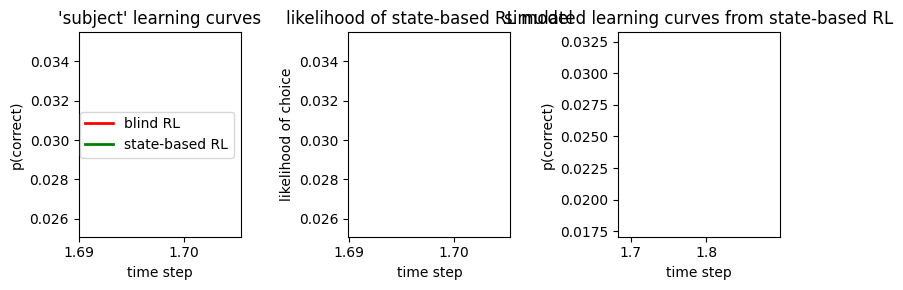

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def simulateflaw(alphaP, beta):
    alphaN = 0
    k = 0
    D = np.zeros((450, 3))
    P = np.zeros((10, 45))

    for s in range(10):
        Q = np.ones((3, 3)) / 3

        for t in range(45):
            k += 1
            o = (t - 1) % 3
            corA = 1 + (o - 1) % 2
            p = np.exp(beta * Q[0, :]) / np.sum(np.exp(beta * Q[0, :]))
            cdf = np.hstack([0, np.cumsum(p)])
            a = np.where(cdf < np.random.rand())[0][-1]
            r = int(a == corA)
            alpha = r * alphaP + (1 - r) * alphaN
            Q[o, a] = Q[o, a] + alpha * (r - Q[o, a])
            D[k-1, :] = [s, a, r]
            P[s, t] = r

    P = np.mean(P[:, ::3] + P[:, 1::3] + P[:, 2::3], axis=1)
    return D, P


def simulate(alphaP, beta):
    alphaN = 0
    k = 0
    D = np.zeros((450, 3))
    P = np.zeros((10, 45))

    for s in range(10):
        Q = np.ones((3, 3)) / 3

        for t in range(45):
            k += 1
            o = (t - 1) % 3
            corA = 1 + (o - 1) % 2
            p = np.exp(beta * Q[o, :]) / np.sum(np.exp(beta * Q[o, :]))
            cdf = np.hstack([0, np.cumsum(p)])
            a = np.where(cdf < np.random.rand())[0][-1]
            r = int(a == corA)
            alpha = r * alphaP + (1 - r) * alphaN
            Q[o, a] = Q[o, a] + alpha * (r - Q[o, a])
            D[k-1, :] = [s, a, r]
            P[s, t] = r

    P = np.mean(P[:, ::3] + P[:, 1::3] + P[:, 2::3], axis=1)
    return D, P


def fitRL(D):
    choice = D[:, 1]
    reward = D[:, 2]
    ps2 = np.zeros((20, 3))
    options = {'maxiter': 100000, 'disp': False}

    for init in range(20):
        x0 = np.random.rand(2)
        res = scipy.optimize.minimize(LLH2, x0, args=(choice, reward), bounds=[(0, 1), (0, 1)], options=options)
        ps2[init, :2] = res.x
        ps2[init, 2] = res.fun

    i = np.argmin(ps2[:, 2])
    ps2 = ps2[i, :2]
    P2, L2 = Posterior2(ps2[0], ps2[1], choice, reward)
    P2 = np.mean(P2)
    L2 = np.mean(L2)
    return ps2, P2, L2


def LLH2(p, choice, reward):
    alphaP = p[0]
    alphaN = 0
    beta = 10 * p[1]
    k = 0
    llh = 0

    for s in range(10):
        Q = np.ones((3, 3)) / 3

        for t in range(45):
            k += 1
            o = (t - 1) % 3
            corA = 1 + (o - 1) % 2
            a = int(choice[k-1])
            pr = np.exp(beta * Q[o, a]) / np.sum(np.exp(beta * Q[o, :]))
            r = int(reward[k-1])
            alpha = r * alphaP + (1 - r) * alphaN
            Q[o, a] = Q[o, a] + alpha * (r - Q[o, a])
            llh += np.log(pr)

    return -llh


def Posterior2(alphaP, beta, choice, reward):
    k = 0
    alphaN = 0
    beta = 10 * beta
    P = np.zeros((10, 45))
    L = np.zeros((10, 45))

    for s in range(10):
        Q = np.ones((3, 3)) / 3

        for t in range(45):
            k += 1
            o = (t - 1) % 3
            corA = 1 + (o - 1) % 2
            pr = np.exp(beta * Q[o, :]) / np.sum(np.exp(beta * Q[o, :]))
            a = int(choice[k-1])
            r = int(reward[k-1])
            alpha = r * alphaP + (1 - r) * alphaN
            Q[o, a] = Q[o, a] + alpha * (r - Q[o, a])
            P[s, t] = pr[corA]
            L[s, t] = pr[a]

    P = np.mean(P[:, ::3] + P[:, 1::3] + P[:, 2::3], axis=1)
    L = np.mean(L[:, ::3] + L[:, 1::3] + L[:, 2::3], axis=1)
    return P, L


def Figure7_ValidateFit():
    np.random.seed(0)
    name = ['blind RL agent', 'RL agent']
    toplot = [[], []]

    for iter in range(2):
        for rep in range(10):
            if iter == 0:
                alphaP = 0.3 + 0.4 * np.random.rand()
                beta = 4 + 5 * np.random.rand()
                D, P = simulateflaw(alphaP, beta)
            else:
                alphaP = 0.6 + 0.1 * np.random.rand()
                beta = 2
                D, P = simulate(alphaP, beta)

            toplot[iter].append([np.mean(P)])
            ps2, P2, L2 = fitRL(D)
            toplot[iter][rep].extend([P2, np.mean(P), L2])

    col = [ 'r', 'g', 'b']

    fig, ax = plt.subplots(1, 3, figsize=(8, 3))

    for iter in range(2):
        type = 0
        ax[0].errorbar(np.mean(np.array(toplot[iter])[:, type], axis=0),np.std(np.array(toplot[iter])[:, type], axis=0) / np.sqrt(rep), color=col[iter], linewidth=2)

        type = 2
        ax[1].errorbar(np.mean(np.array(toplot[iter])[:, type], axis=0),
                       np.std(np.array(toplot[iter])[:, type], axis=0) / np.sqrt(rep), color=col[iter], linewidth=2)

        type = 1
        ax[2].errorbar(np.mean(np.array(toplot[iter])[:, type], axis=0),
                       np.std(np.array(toplot[iter])[:, type], axis=0) / np.sqrt(rep), color=col[iter], linewidth=2)

    ax[0].set_title("'subject' learning curves")
    ax[0].legend(['blind RL', 'state-based RL'])
    ax[0].set_xlabel('time step')
    ax[0].set_ylabel('p(correct)')

    ax[1].set_title("likelihood of state-based RL model")
    ax[1].set_xlabel('time step')
    ax[1].set_ylabel('likelihood of choice')

    ax[2].set_title("simulated learning curves from state-based RL")
    ax[2].set_xlabel('time step')
    ax[2].set_ylabel('p(correct)')

    plt.tight_layout()
    plt.savefig('Figure7.pdf')
    plt.show()


Figure7_ValidateFit()


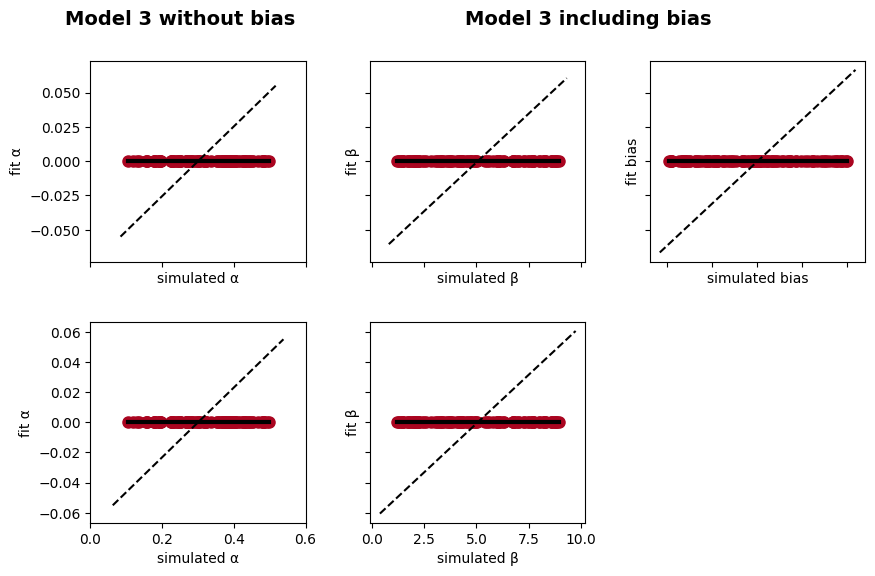

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def simulate(alpha, beta, bias):
    k = 0
    D = []

    for s in range(0, 20):
        Q = [0.5, 0.5]
        corA = 1 if s % 2 == 1 else 2

        for t in range(0, 50):
            k += 1
            p2 = 1 / (1 + np.exp(beta * (bias + Q[0] - Q[1])))
            a = 1 if np.random.rand() < p2 else 2
            c = a == corA
            r = c if np.random.rand() < 0.8 else 1 - c
            Q[a - 1] = Q[a - 1] + alpha * (r - Q[a - 1])
            D.append([s, a, r])

    return np.array(D)


def fitRL(D):
    choice = D[:, 1]
    reward = D[:, 2]
    options = {'maxiter': 100000, 'disp': False}

    # Fit with no bias RL
    ps1 = []
    for _ in range(20):
        x0 = np.random.rand(2)
        res = minimize(LLH1, x0, args=(choice, reward), bounds=[(0, 1), (0, 1)], options=options)
        ps1.append(res.x.tolist() + [res.fun])
    ps1 = sorted(ps1, key=lambda x: x[2])[0]

    # Fit with bias RL
    ps2 = []
    for _ in range(20):
        x0 = np.random.rand(3)
        res = minimize(LLH2, x0, args=(choice, reward), bounds=[(0, 1), (0, 1), (0, 1)], options=options)
        ps2.append(res.x.tolist() + [res.fun])
    ps2 = sorted(ps2, key=lambda x: x[3])[0]

    return ps1, ps2


def LLH1(p, choice, reward):
    alpha = p[0]
    beta = 10 * p[1]
    bias = 0
    k = 0
    llh = 0

    for s in range(0, 20):
        Q = [0.5, 0.5]

        for t in range(0, 50):
            k += 1
            p2 = 1 / (1 + np.exp(beta * (bias + Q[0] - Q[1])))
            pr = [1 - p2, p2]
            a = choice[k - 1]
            r = reward[k - 1]
            Q[a - 1] = Q[a - 1] + alpha * (r - Q[a - 1])
            llh += np.log(pr[a - 1])

    return -llh


def LLH2(p, choice, reward):
    alpha = p[0]
    beta = 10 * p[1]
    bias = p[2]
    k = 0
    llh = 0

    for s in range(0, 10):
        Q = [0.5, 0.5]

        for t in range(1, 51):
            k += 1
            p2 = 1 / (1 + np.exp(beta * (bias + Q[0] - Q[1])))
            pr = [1 - p2, p2]
            a = choice[k - 1]
            r = reward[k - 1]
            Q[a - 1] = Q[a - 1] + alpha * (r - Q[a - 1])
            llh += np.log(pr[a - 1])

    return -llh


np.random.seed(0)
data = np.zeros((100, 10))

for rep in range(0, 100):
    alpha = 0.1 + 0.4 * np.random.rand()
    beta = 1 + 8 * np.random.rand()
    bias = 0.2 * np.random.rand()

    D = simulate(alpha, beta, bias)
    ps1, ps2 = fitRL(D)

    data[rep - 1] = [alpha, beta, bias, *ps1[:2], 0, *ps2]

data[:, 4] *= 10
data[:, 7] *= 10

names = ['α', 'β', 'bias']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
AZred = [val / 256 for val in [171, 5, 32]]


for i in range(2):
    for j in range(3):
        if i == 1 and j == 2:
            continue
        ax[i, j].plot(data[:, j], data[:, 3 + i], 'o', color=AZred, markersize=8, linewidth=1)
        ax[i, j].plot(ax[i, j].get_xlim(), ax[i, j].get_ylim(), 'k--')
        ax[i, j].plot(np.unique(data[:, j]), np.poly1d(np.polyfit(data[:, j], data[:, 3 + i], 1))(np.unique(data[:, j])), 'k-', linewidth=3)
        ax[i, j].set_xlabel(f'simulated {names[j]}')
        ax[i, j].set_ylabel(f'fit {names[j]}')

ax[1, 2].axis('off')
ax[0, 0].set_xlim([0, 0.6])
ax[1, 0].set_xlim([0, 0.6])

plt.figtext(0.1, 0.94, 'Model 3 without bias', fontsize=14, fontweight='bold')
plt.figtext(0.5, 0.94, 'Model 3 including bias', fontsize=14, fontweight='bold')

plt.savefig('Figure6b.pdf')
plt.show()


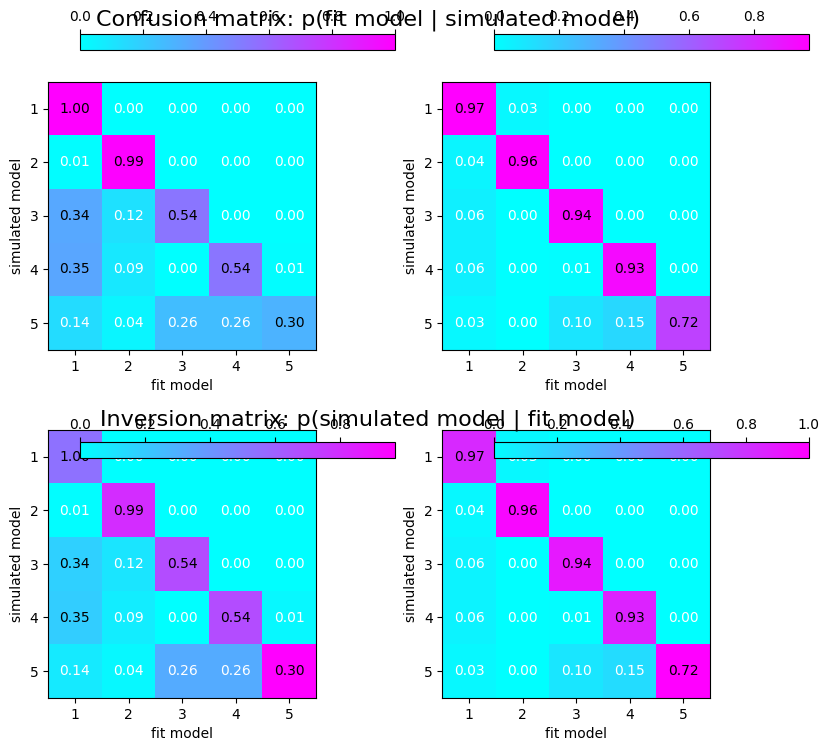

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

CM = np.zeros((5, 5))

T = 1000
mu = [0.2, 0.8]

CM1 = np.array([[1, 0, 0, 0, 0],
                [0.01, 0.99, 0, 0, 0],
                [0.34, 0.12, 0.54, 0, 0],
                [0.35, 0.09, 0, 0.54, 0.01],
                [0.14, 0.04, 0.26, 0.26, 0.3]])

CM2 = np.array([[0.97, 0.03, 0, 0, 0],
                [0.04, 0.96, 0, 0, 0],
                [0.06, 0, 0.94, 0, 0],
                [0.06, 0, 0.01, 0.93, 0],
                [0.03, 0, 0.1, 0.15, 0.72]])

# Inverse confusion matrices
iCM1 = CM1 / np.sum(CM1, axis=0)
iCM2 = CM2 / np.sum(CM2, axis=0)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(9, 8))

# Confusion matrix: p(fit model | simulated model)
im1 = ax[0, 0].imshow(CM1, cmap='cool')
im2 = ax[0, 1].imshow(CM2, cmap='cool')

# Inversion matrix: p(simulated model | fit model)
im3 = ax[1, 0].imshow(np.round(iCM1 * 100) / 100, cmap='cool')
im4 = ax[1, 1].imshow(np.round(iCM2 * 100) / 100, cmap='cool')

# Text annotations
for i in range(2):
    for j in range(2):
        ax[i, j].set_xticks(np.arange(5))
        ax[i, j].set_yticks(np.arange(5))
        ax[i, j].set_xticklabels(np.arange(1, 6))
        ax[i, j].set_yticklabels(np.arange(1, 6))
        ax[i, j].set_xlabel('fit model')
        ax[i, j].set_ylabel('simulated model')

        for row in range(5):
            for col in range(5):
                if (i == 0 and j == 0) or (i == 1 and j == 0):
                    text_color = 'w' if CM1[row, col] < 0.3 else 'k'
                    ax[i, j].text(col, row, f'{CM1[row, col]:.2f}', color=text_color, ha='center', va='center')
                else:
                    text_color = 'w' if CM2[row, col] < 0.3 else 'k'
                    ax[i, j].text(col, row, f'{CM2[row, col]:.2f}', color=text_color, ha='center', va='center')

# Set labels and titles
fig.text(0.5, 0.95, 'Confusion matrix: p(fit model | simulated model)', fontsize=16, ha='center')
fig.text(0.5, 0.45, 'Inversion matrix: p(simulated model | fit model)', fontsize=16, ha='center')

# Colorbars
cax1 = fig.add_axes([0.18, 0.92, 0.35, 0.02])
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cax1.xaxis.set_ticks_position('top')

cax2 = fig.add_axes([0.64, 0.92, 0.35, 0.02])
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cax2.xaxis.set_ticks_position('top')

cax3 = fig.add_axes([0.18, 0.41, 0.35, 0.02])
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')
cax3.xaxis.set_ticks_position('top')

cax4 = fig.add_axes([0.64, 0.41, 0.35, 0.02])
cbar4 = fig.colorbar(im4, cax=cax4, orientation='horizontal')
cax4.xaxis.set_ticks_position('top')

# Adjust spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Save the figure
plt.savefig('Figure5.pdf')
plt.show()


0


<ipython-input-171-6ce8659f00b3>:15: RuntimeWarning: invalid value encountered in true_divide
  FM = np.round(100 * CM / np.sum(CM[0, :])) / 100


TypeError: ignored

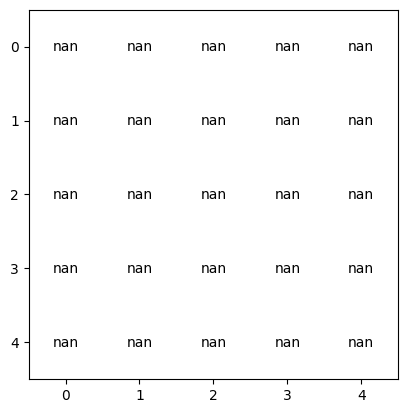

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from SimulationFunctions import simulate_M1random_v1, simulate_M2WSLS_v1, simulate_M3RescorlaWagner_v1, simulate_M4ChoiceKernel_v1, simulate_M5RWCK_v1
#from FittingFunctions import fit_all_v1
#from HelperFunctions import imageTextMatrix, addFacetLines, saveFigurePdf

CM = np.zeros((5, 5))
T = 1000
mu = np.array([0.2, 0.8])

for count in range(100):
    print(count)
    plt.figure(1)
    plt.clf()
    FM = np.round(100 * CM / np.sum(CM[0, :])) / 100
    t = imageTextMatrix(FM)

    t_low_values = t[FM < 0.3].flatten()

    # Apply set_color('w') to each element of the flattened array
    for element in t_low_values:
        element.set_color('w')

    [l1, l2] = addFacetLines(CM)
    t.set_fontsize(22)
    plt.title('count = ' + str(count))
    plt.xticks([1, 2, 3, 4, 5])
    plt.yticks([1, 2, 3, 4, 5])
    plt.xlabel('fit model')
    plt.ylabel('simulated model')
    plt.tick_params(axis='x', top=True, direction='out')
    plt.tick_params(axis='y', right=True, direction='out')
    plt.gca().xaxis.set_label_position('top')
    plt.gca().set_position([0.1, 0.2, 0.8, 0.7])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.draw()
    plt.pause(0.01)

    # Model 1
    b = np.random.rand()
    a, r = simulate_M1random_v1(T, mu, b)
    BIC, iBEST, BEST = fit_all_v1(a, r)
    CM[0, :] += BEST

    # Model 2
    epsilon = np.random.rand()
    a, r = simulate_M2WSLS_v1(T, mu, epsilon)
    BIC, iBEST, BEST = fit_all_v1(a, r)
    CM[1, :] += BEST

    # Model 3
    alpha = np.random.rand()
    beta = 1 + np.random.exponential(1)
    a, r = simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)
    BIC, iBEST, BEST = fit_all_v1(a, r)
    CM[2, :] += BEST

    # Model 4
    alpha_c = np.random.rand()
    beta_c = 1 + np.random.exponential(1)
    a, r = simulate_M4ChoiceKernel_v1(T, mu, alpha_c, beta_c)
    BIC, iBEST, BEST = fit_all_v1(a, r)
    CM[3, :] += BEST

    # Model 5
    alpha = np.random.rand()
    beta = 1 + np.random.exponential(1)
    alpha_c = np.random.rand()
    beta_c = 1 + np.random.exponential(1)
    a, r = simulate_M5RWCK_v1(T, mu, alpha, beta, alpha_c, beta_c)
    BIC, iBEST, BEST = fit_all_v1(a, r)
    CM[4, :] += BEST

plt.figure(1)
plt.title('')
plt.gcf().set_size_inches(8, 6)
plt.gca().tick_params(labelsize=28)
saveFigurePdf(plt.gcf(), '~/Figures/Figure5b')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set random seed
np.random.seed(2)

# Experiment parameters
T = 100  # Number of trials
mu = [0.2, 0.8]  # Mean reward of bandits

# Model 3: Rescorla Wagner
Xsim = np.zeros((2, 100))
Xfit = np.zeros((2, 100))

for count in range(100):
    alpha = np.random.rand()
    beta = expon.rvs(scale=10)
    a, r = simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)  # TODO: Implement simulate_M3RescorlaWagner_v1 function
    Xf, LL, BIC = fit_M3RescorlaWagner_v1(a, r)  # TODO: Implement fit_M3RescorlaWagner_v1 function

    Xsim[0, count] = alpha
    Xsim[1, count] = beta
    Xfit[0, count] = Xf[0]
    Xfit[1, count] = Xf[1]

# Basic parameter recovery plots
names = ['learning rate', 'softmax temperature']
symbols = ['\alpha', '\beta']
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(Xsim.shape[0]):
    ax[i].plot(Xsim[i, :], Xfit[i, :], 'o', color='r', markersize=8, linewidth=1)
    xl = ax[i].get_xlim()
    ax[i].plot(xl, xl, 'k--')

# Find 'bad' alpha values
thresh = 0.25
ind = np.abs(Xsim[0, :] - Xfit[0, :]) > thresh

for i in range(2):
    ax[i].plot(Xsim[i, ind], Xfit[i, ind], 'o', color='b', markersize=8, linewidth=1, markerfacecolor=[0.5, 0.5, 0.5])

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].set_xlabel('simulated \alpha')
ax[0].set_ylabel('fit \alpha')
ax[1].set_xlabel('simulated \beta')
ax[1].set_ylabel('fit \beta')

plt.tight_layout()
plt.show()


NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.arange(0.05, 1.05, 0.05)
betas = np.concatenate(([1], np.arange(5, 55, 5)))
rhos = np.arange(0, 1.05, 0.05)
Ks = np.arange(2, 7)

realalpha = 0.1
realbeta = 10
realrho = 0.9
realK = 4

update = np.zeros(4500, dtype=int)
choice = np.zeros(4500, dtype=int)
rew = np.zeros(4500, dtype=int)
stim = np.zeros(4500, dtype=int)
setsize = np.zeros(4500, dtype=int)

b = 0
t = 0
for rep in range(3):
    for ns in range(2, 7):
        b += 1
        update[t] = 1
        w = realrho * (min(1, realK / ns))
        Q = np.full(ns, 0.5)
        WM = np.full(ns, 0.5)
        trials = np.tile(np.arange(1, ns + 1), 15)
        for s in trials:
            t += 1
            softmax1 = np.exp(realbeta * Q[s - 1, :]) / np.sum(np.exp(realbeta * Q[s - 1, :]))
            softmax2 = np.exp(50 * WM[s - 1, :]) / np.sum(np.exp(50 * WM[s - 1, :]))
            pr = (1 - w) * softmax1 + w * softmax2
            r = np.random.rand()
            if r < pr[0]:
                choice[t - 1] = 1
            elif r < pr[0] + pr[1]:
                choice[t - 1] = 2
            else:
                choice[t - 1] = 3
            rew[t - 1] = int(choice[t - 1] == (s % 3 + 1))
            Q[s - 1, choice[t - 1] - 1] = Q[s - 1, choice[t - 1] - 1] + realalpha * (rew[t - 1] - Q[s - 1, choice[t - 1] - 1])
            WM[s - 1, choice[t - 1] - 1] = rew[t - 1]
            stim[t - 1] = s
            setsize[t - 1] = ns

update[t] = 0

llh = np.zeros((len(alphas), len(betas), len(rhos), len(Ks)))

for i1, alpha in enumerate(alphas):
    for i2, beta in enumerate(betas):
        for j1, rho in enumerate(rhos):
            for j2, K in enumerate(Ks):
                l = 0
                Q = np.full(K, 0.5)
                WM = np.full(K, 0.5)
                for t in range(len(stim)):
                    s = stim[t]
                    if update[t] == 1:
                        Q = np.full(setsize[t], 0.5)
                        WM = np.full(setsize[t], 0.5)
                    w = rho * (min(1, K / setsize[t]))
                    softmax1 = np.exp(beta * Q[s - 1, :]) / np.sum(np.exp(beta * Q[s - 1, :]))
                    softmax2 = np.exp(50 * WM[s - 1, :]) / np.sum(np.exp(50 * WM[s - 1, :]))
                    pr = (1 - w) * softmax1 + w * softmax2
                    l += np.log(pr[choice[t] - 1])
                    Q[s - 1, choice[t] - 1] += alpha * (rew[t] - Q[s - 1, choice[t] - 1])
                    WM[s - 1, choice[t] - 1] = rew[t]
                llh[i1, i2, j1, j2] = l

llh2 = np.max(np.max(llh, axis=3), axis=1)
llh2 = llh2[:-1, :-1]
mi = np.min(llh2)
ma = np.max(llh2)
x, y = np.unravel_index(llh2.argmax(), llh2.shape)

plt.figure()
plt.imshow(llh2.T, origin='lower', extent=[0.05, 1.0, 0.0, 1.0], aspect='auto', cmap='viridis')
plt.colorbar()
plt.plot(alphas[x], rhos[y], 'ok')
plt.plot(realalpha, realrho, 'xr')
plt.xlabel('alpha')
plt.ylabel('rho')
plt.title('Log-Likelihood')
plt.show()

for i in range(1):
    out = np.setdiff1d(np.arange(4), i)
    llh1 = np.max(np.max(np.max(llh, axis=out[3]), axis=out[2]), axis=out[1])
    v = np.max(llh1)
    w = np.argmax(llh1)
    plt.plot(ps[i], llh1, 'o-', linewidth=2)
    plt.plot(ps[i][w], v, 'rx', linewidth=2)
    plt.xlabel(na[i])
    plt.ylabel('Log-Likelihood')
    plt.title(na[i])
    plt.show()


IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_constrained


def simulate(realalpha, realbeta, realrho, realK):
    b = 0
    t = 0
    stim = []
    update = []
    choice = []
    rew = []
    setsize = []

    for rep in range(3):
        for ns in range(2, 7):
            b += 1
            update.append(1)
            w = realrho * (min(1, realK / ns))
            Q = np.full((ns, 3), 1/3)
            WM = np.full((ns, 3), 1/3)
            trials = np.repeat(np.arange(1, ns+1), 15)
            for s in trials:
                t += 1
                stim.append(s)
                setsize.append(ns)
                softmax1 = np.exp(realbeta * Q[s-1, :]) / np.sum(np.exp(realbeta * Q[s-1, :]))
                softmax2 = np.exp(50 * WM[s-1, :]) / np.sum(np.exp(50 * WM[s-1, :]))
                pr = (1 - w) * softmax1 + w * softmax2
                r = np.random.rand()
                if r < pr[0]:
                    choice.append(1)
                elif r < pr[0] + pr[1]:
                    choice.append(2)
                else:
                    choice.append(3)
                rew.append(choice[t-1] == (s % 3) + 1)
                Q[s-1, choice[t-1]-1] = Q[s-1, choice[t-1]-1] + realalpha * (rew[t-1] - Q[s-1, choice[t-1]-1])
                WM[s-1, choice[t-1]-1] = rew[t-1]
    update.append(0)
    return np.array(stim), np.array(update), np.array(choice), np.array(rew), np.array(setsize)


def computellh(p, K, stim, update, choice, rew, setsize):
    rho = p[0]
    alpha = p[1]
    beta = 50 * p[2]
    l = 0
    for t in range(len(stim)):
        s = stim[t]
        if update[t]:
            Q = np.full((setsize[t], 3), 1/3)
            WM = np.full((setsize[t], 3), 1/3)
        w = rho * (min(1, K / setsize[t]))
        softmax1 = np.exp(beta * Q[s-1, :]) / np.sum(np.exp(beta * Q[s-1, :]))
        softmax2 = np.exp(50 * WM[s-1, :]) / np.sum(np.exp(50 * WM[s-1, :]))
        pr = (1 - w) * softmax1 + w * softmax2
        l += np.log(pr[choice[t]-1])
        Q[s-1, choice[t]-1] = Q[s-1, choice[t]-1] + alpha * (rew[t] - Q[s-1, choice[t]-1])
        WM[s-1, choice[t]-1] = rew[t]
    return -l


def localminima():
    alphas = np.arange(0.06, 0.51, 0.01)
    betas = np.concatenate(([1], np.arange(4, 21, 2)))
    rhos = np.arange(0.5, 0.99, 0.01)
    Ks = np.arange(2, 7)

    realalpha = 0.1
    realbeta = 8
    realrho = 0.9
    realK = 4

    stim, update, choice, rew, setsize = simulate(realalpha, realbeta, realrho, realK)

    options = {'maxiter': 100000, 'disp': False}

    pars = np.zeros((10, 4))
    for init in range(10):
        x0 = np.random.rand(3)
        result = fmin_constrained(lambda x: computellh(x, realK, stim, update, choice, rew, setsize), x0,
                                  [0, 0, 0], [1, 1, 1], options=options)
        pars[init, :3] = result.x
        pars[init, 3] = result.fun
    best_index = np.argmin(pars[:, 3])
    pars = pars[best_index, :]

    llh = np.zeros((len(alphas), len(betas), len(rhos), len(Ks)))
    for i1, alpha in enumerate(alphas):
        for i2, beta in enumerate(betas):
            for j1, rho in enumerate(rhos):
                for j2, K in enumerate(Ks):
                    p = [rho, alpha, beta / 50]
                    llh[i1, i2, j1, j2] = -computellh(p, K, stim, update, choice, rew, setsize)

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].imshow(np.squeeze(np.max(llh, axis=2)).T, extent=[alphas[0], alphas[-1], rhos[0], rhos[-1]],
                     aspect='auto', origin='lower', cmap='jet')
    axs[0, 0].colorbar(label='Log Likelihood')
    best_indices = np.unravel_index(np.argmax(np.max(llh, axis=2)), llh.shape[:2])
    axs[0, 0].plot(alphas[best_indices[0]], rhos[best_indices[1]], 'ok')
    axs[0, 0].plot(realalpha, realrho, 'xr')
    axs[0, 0].plot(pars[1], pars[0], '*k')
    axs[0, 0].set_xlabel('alpha')
    axs[0, 0].set_ylabel('rho')
    axs[0, 0].set_title('Parameter Space')

    bestllh = np.zeros((100, 10))
    bestpars = np.zeros((100, 10, 3))
    when = np.zeros((100, 3))

    for sim in range(100):
        stim, update, choice, rew, setsize = simulate(realalpha, realbeta, realrho, realK)
        pars = np.zeros((ninitialpoints, 4))
        for init in range(ninitialpoints):
            x0 = np.random.rand(3)
            result = fmin_constrained(lambda x: computellh(x, realK, stim, update, choice, rew, setsize), x0,
                                      [0, 0, 0], [1, 1, 1], options=options)
            pars[init, :3] = result.x
            pars[init, 3] = result.fun
            bestllh[sim, init] = np.min(pars[:, 3])
            bestpars[sim, init, :] = pars[np.argmin(pars[:, 3]), :3]
        best_index = np.argmin(pars[:, 3])
        when[sim, 0] = best_index
        when[sim, 1] = np.argwhere(bestllh[sim, :] < bestllh[sim, -1] + 0.01)[0, 0]
        when[sim, 2] = np.argwhere(bestllh[sim, :] < bestllh[sim, -1] + 0.1)[0, 0]

    axs[0, 1].errorbar(np.arange(1, 11), np.mean(bestllh, axis=0), yerr=np.std(bestllh, axis=0) / np.sqrt(100),
                       linewidth=1)
    axs[0, 1].set_xlabel('Starting Point Iteration')
    axs[0, 1].set_ylabel('Local-Global Best NLH')
    axs[0, 1].set_title('Local-Global Best NLH')

    bestpars = bestpars[:, :, :3] - np.repeat(bestpars[:, :, 3:], ninitialpoints - 1, axis=2)
    bestpars = np.sum(bestpars ** 2, axis=2)
    axs[1, 0].errorbar(np.arange(1, 11), np.mean(bestpars, axis=0), yerr=np.std(bestpars, axis=0) / np.sqrt(100),
                       linewidth=1)
    axs[1, 0].set_xlabel('Starting Point Iteration')
    axs[1, 0].set_ylabel('D(Local-Global Best Param)')
    axs[1, 0].set_title('Distance to Global Best')

    axs[1, 1].plot(np.sort(when[:, 0]), 'o-', linewidth=1, label='Global = Best')
    axs[1, 1].plot(np.sort(when[:, 1]), 'o-', linewidth=1, label='Global = |LLH - Best| < 0.01')
    axs[1, 1].set_xlabel('Sorted Simulation Number')
    axs[1, 1].set_ylabel('Iteration Where Global LLH First Reached')
    axs[1, 1].set_title('Iterations to Global Best')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()


run_localminima()


ImportError: ignored

[[0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0.50647321 0.7925     0.76948052 0.72202296]
 [0.45980312 0

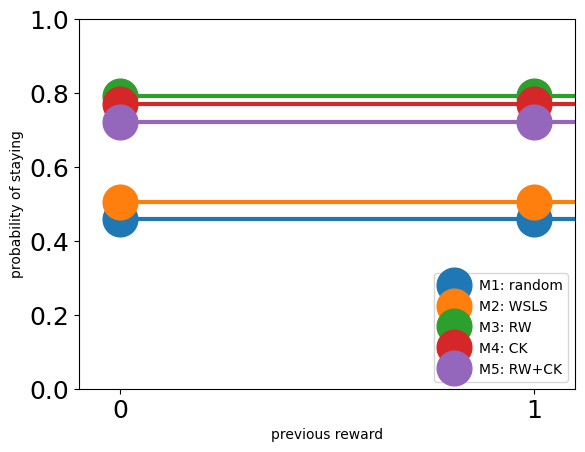

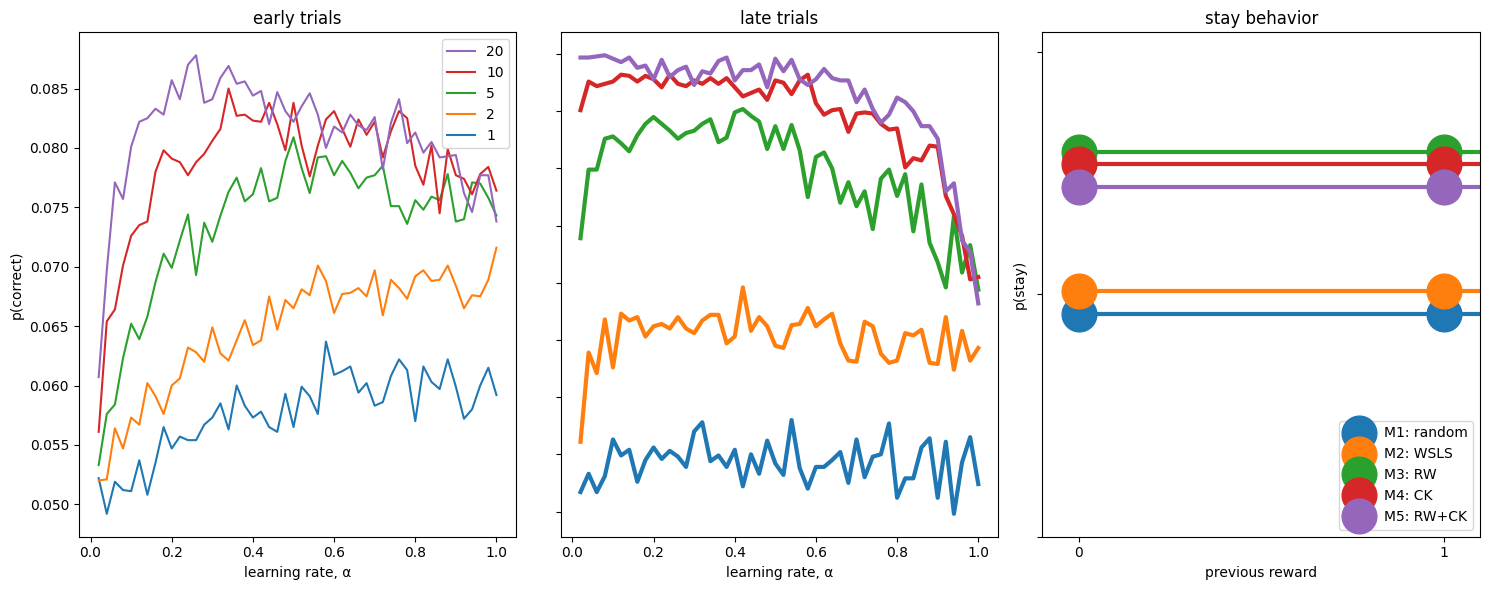

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set up colors
AZred = [val / 256 for val in [171, 5, 32]]
AZblue = [val / 256 for val in[12, 35, 75]]
AZcactus = [val / 256 for val in[92, 135, 39]]
AZsky = [val / 256 for val in[132, 210, 226]]
AZriver = [val / 256 for val in[7, 104, 115]]
AZsand = [val / 256 for val in[241, 158, 31]]
AZmesa = [val / 256 for val in[183, 85, 39]]
AZbrick = [val / 256 for val in[74, 48, 39]]

# experiment parameters
T = 100  # number of trials
mu = [0.2, 0.8]  # mean reward of bandits

# number of repetitions for simulations
Nrep = 110
num_sims = 110  # Number of simulations
sim = [{}, {}, {}, {}, {}]  # Initializing the list of dictionaries
for i in range(5):
  # Initialize the key 'a' in the dictionary sim[0]
  sim[i]['a'] = np.zeros((T, num_sims))  # Replace `num_sims` with the appropriate value

  # Initialize the key 'r' in the dictionary sim[0]
  sim[i]['r'] = np.zeros((T, num_sims))  # Replace `num_sims` with the appropriate value

# Model 1: Random responding
for n in range(Nrep):
    b = 0.5
    a, r = simulate_M1random_v1(T, mu, b)
    sim[0]['a'][:, n] = a
    sim[0]['r'][:, n] = r

# Model 2: Win-stay-lose-shift
for n in range(Nrep):
    epsilon = 0.1
    a, r = simulate_M2WSLS_v1(T, mu, epsilon)
    sim[1]['a'][:, n] = a
    sim[1]['r'][:, n] = r

# Model 3: Rescorla Wagner
for n in range(Nrep):
    alpha = 0.1
    beta = 5
    a, r = simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)
    sim[2]['a'][:, n] = a
    sim[2]['r'][:, n] = r

# Model 4: Choice kernel
for n in range(Nrep):
    alpha_c = 0.1
    beta_c = 3
    a, r = simulate_M4ChoiceKernel_v1(T, mu, alpha_c, beta_c)
    sim[3]['a'][:, n] = a
    sim[3]['r'][:, n] = r

# Model 5: Rescorla-Wagner + choice kernel
for n in range(Nrep):
    alpha = 0.1
    beta = 5
    alpha_c = 0.1
    beta_c = 1
    a, r = simulate_M5RWCK_v1(T, mu, alpha, beta, alpha_c, beta_c)
    sim[4]['a'][:, n] = a
    sim[4]['r'][:, n] = r

# Win-stay-lose-shift analysis
wsls = np.zeros((T, len(sim)))
for i in range(len(sim)):
    for n in range(Nrep):
        sim[i]['wsls'] = analysis_WSLS_v1(sim[i]['a'][:, n], sim[i]['r'][:, n])
    wsls[:, i] = np.nanmean(sim[i]['wsls'], axis=0)
print (wsls)
# Plot WSLS behavior for all models
plt.figure(1)
l = plt.plot( wsls)
plt.ylim([0, 1])
plt.setp(l, marker='.', markersize=50, linewidth=3)
plt.legend(['M1: random', 'M2: WSLS', 'M3: RW', 'M4: CK', 'M5: RW+CK'], loc='lower right')
plt.xlabel('previous reward')
plt.ylabel('probability of staying')
plt.xticks([0, 1])
plt.xlim([-0.1, 1.1])
plt.tick_params(direction='out', labelsize=18)

# p(correct) analysis
alphas = np.arange(0.02, 1.02, 0.02)
betas = [1, 2, 5, 10, 20]
correct = np.zeros((len(alphas), len(betas), 1000))
correctEarly = np.zeros((len(alphas), len(betas), 1000))
correctLate = np.zeros((len(alphas), len(betas), 1000))

for n in range(100):
    for i in range(len(alphas)):
        for j in range(len(betas)):
            a, r = simulate_M3RescorlaWagner_v1(T, mu, alphas[i], betas[j])
            imax = np.argmax(mu)
            correct[i, j, n] = np.nanmean(a == imax)
            correctEarly[i, j, n] = np.nanmean(a[:10] == imax)
            correctLate[i, j, n] = np.nanmean(a[-10:] == imax)

# Plot p(correct) behavior
E = np.nanmean(correctEarly, axis=2)
L = np.nanmean(correctLate, axis=2)

fig, ax = plt.subplots(1, 3, figsize=(15, 6))

l = plt.plot(wsls)
plt.ylim([0, 1])
plt.setp(l, marker='.', markersize=50, linewidth=3)
leg1 = plt.legend(['M1: random', 'M2: WSLS', 'M3: RW', 'M4: CK', 'M5: RW+CK'], loc='lower right')
plt.xlabel('previous reward')
plt.ylabel('p(stay)')
plt.title('stay behavior', fontweight='normal')
plt.xlim([-0.1, 1.1])
plt.ylim([0, 1.04])
plt.xticks([0, 1])
plt.yticks([0, 0.5, 1])
plt.setp(leg1)#, fontsize=12)
#plt.setp(leg1, position=[0.19, 0.2133, 0.1440, 0.2617])

plt.sca(ax[0])
l = plt.plot(alphas, E)
plt.xlabel('learning rate, α')
plt.ylabel('p(correct)')
plt.title('early trials', fontweight='normal')
leg2 = plt.legend(l[::-1], betas[::-1])
plt.setp([leg1, leg2])#, fontsize=12)
#plt.setp(leg2, position=[0.6267, 0.6453, 0.1007, 0.2617])

plt.sca(ax[1])
l = plt.plot(alphas, L)
plt.xlabel('learning rate, α')
plt.title('late trials', fontweight='normal')
for i in range(len(l)):
    f = (i - 1) / (len(l) - 1)
    #plt.setp(l[i], color=AZred * f + AZblue * (1 - f))
plt.setp(l, linewidth=3)
plt.setp(ax[1], yticklabels=[])

plt.sca(ax[2])
plt.setp(ax[2], yticklabels=[])
plt.tight_layout()

plt.show()
# Save resulting figure
#fig.savefig('./Figures/Figure2.pdf')

<ipython-input-104-9af6971b682b>:10: RuntimeWarning: overflow encountered in exp
  p = np.exp(beta * Q) / np.sum(np.exp(beta * Q))
<ipython-input-104-9af6971b682b>:10: RuntimeWarning: invalid value encountered in true_divide
  p = np.exp(beta * Q) / np.sum(np.exp(beta * Q))
<ipython-input-104-9af6971b682b>:20: RuntimeWarning: divide by zero encountered in log
  NegLL = -np.sum(np.log(choiceProb))
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-108-c7882ca326f1>:49: UserWarning: Glyph 7 () missing from current font.
  plt.savefig('Figure4.png')
<ipython-input-108-c7882ca326f1>:49: UserWarning: Glyph 8 () missing from current font.
  plt.savefig('Figure4.png')
<ipython-input-108-c7882ca326f1>:50: UserWarning: Glyph 7 () missing from current font.
  plt.savefig('Figure4.eps')
<ipython-input-108-c7882ca326f1>:50: UserWarning: Glyph 8 () missing 

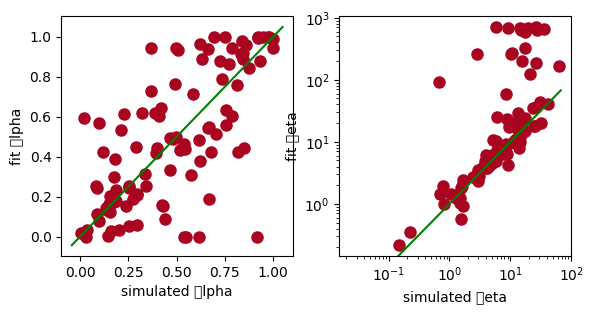

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Experiment parameters
T = 100  # number of trials
mu = [0.2, 0.8]  # mean reward of bandits

np.random.seed(2)

# Model 3: Rescorla Wagner
num_simulations = 100
Xsim = np.zeros((2, num_simulations))
Xfit = np.zeros((2, num_simulations))

for count in range(num_simulations):
    alpha = random.random()
    beta = np.random.exponential(scale=10)
    a, r = simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)
    Xf, LL, BIC = fit_M3RescorlaWagner_v1(a, r)

    Xsim[0, count] = alpha
    Xsim[1, count] = beta
    Xfit[0, count] = Xf[0]
    Xfit[1, count] = Xf[1]

# Basic parameter recovery plots
names = ['learning rate', 'softmax temperature']
symbols = ['\alpha', '\beta']
plt.figure(1, figsize=(6, 3))
plt.subplots_adjust(bottom=0.1, left=0.1, right=0.95, top=0.9, wspace=0.2, hspace=0.4)
ax = plt.subplot(1, 2, 1)
plt.plot(Xsim[0, :], Xfit[0, :], 'o', color=AZred, markersize=8, linewidth=1)
xl = plt.gca().get_xlim()
plt.plot(xl, xl, 'g')
plt.xlabel('simulated ' + symbols[0])
plt.ylabel('fit ' + symbols[0])

ax = plt.subplot(1, 2, 2)
plt.plot(Xsim[1, :], Xfit[1, :], 'o', color=AZred, markersize=8, linewidth=1)
xl = plt.gca().get_xlim()
plt.plot(xl, xl, 'g')
plt.xlabel('simulated ' + symbols[1])
plt.ylabel('fit ' + symbols[1])

plt.xscale('log')
plt.yscale('log')

plt.savefig('Figure4.png')
plt.savefig('Figure4.eps')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate(realalpha, realbeta, realrho, realK):
    b = 0
    t = 0
    stim = []
    update = []
    choice = []
    rew = []
    setsize = []

    for rep in range(3):
        for ns in range(2, 7):
            b += 1
            update.append(1)
            w = realrho * (min(1, realK / ns))
            Q = (1/3) * np.ones((ns, 3))
            WM = (1/3) * np.ones((ns, 3))
            trials = np.repeat(np.arange(1, ns+1), 15)

            for s in trials:
                t += 1
                stim.append(s)
                setsize.append(ns)
                softmax1 = np.exp(realbeta * Q[s-1]) / np.sum(np.exp(realbeta * Q[s-1]))
                softmax2 = np.exp(50 * WM[s-1]) / np.sum(np.exp(50 * WM[s-1]))
                pr = (1 - w) * softmax1 + w * softmax2
                r = np.random.rand()

                if r < pr[0]:
                    choice.append(1)
                elif r < pr[0] + pr[1]:
                    choice.append(2)
                else:
                    choice.append(3)

                rew.append(choice[t-1] == (s % 3) + 1)
                Q[s-1, choice[t-1]-1] = Q[s-1, choice[t-1]-1] + realalpha * (rew[t-1] - Q[s-1, choice[t-1]-1])
                WM[s-1, choice[t-1]-1] = rew[t-1]

    update.append(0)
    return np.array(stim), np.array(update), np.array(choice), np.array(rew), np.array(setsize)

def computellh(p, K, stim, update, choice, rew, setsize):
    rho = p[0]
    alpha = p[1]
    beta = 50 * p[2]
    l = 0

    for t in range(len(stim)):
        s = stim[t]

        if update[t]:
            Q = (1/3) * np.ones((setsize[t], 3))
            WM = (1/3) * np.ones((setsize[t], 3))

        w = rho * (min(1, K / setsize[t]))
        softmax1 = np.exp(beta * Q[s-1]) / np.sum(np.exp(beta * Q[s-1]))
        softmax2 = np.exp(50 * WM[s-1]) / np.sum(np.exp(50 * WM[s-1]))
        pr = (1 - w) * softmax1 + w * softmax2
        l += np.log(pr[choice[t]-1])
        Q[s-1, choice[t]-1] = Q[s-1, choice[t]-1] + alpha * (rew[t] - Q[s-1, choice[t]-1])
        WM[s-1, choice[t]-1] = rew[t]

    return -l

alphas = np.arange(0.06, 0.51, 0.01)
betas = np.concatenate(([1], np.arange(4, 21, 2)))
rhos = np.arange(0.5, 0.99, 0.01)
Ks = np.arange(2, 7)

realalpha = 0.1
realbeta = 8
realrho = 0.9
realK = 4

stim, update, choice, rew, setsize = simulate(realalpha, realbeta, realrho, realK)

options = {'maxfun': 100000, 'disp': False, 'algorithm': 'active-set'}
pars = np.zeros((10, 4))
bestllh = np.zeros((100, 10))
bestpars = np.zeros((100, 10, 3))
when = np.zeros((100, 3))

for init in range(10):
    x0 = np.random.rand(3)
    res = minimize(lambda x: computellh(x, realK, stim, update, choice, rew, setsize), x0, method='SLSQP', bounds=[(0, 1)] * 3, options=options)
    pars[init, :-1] = res.x
    pars[init, -1] = res.fun

mf = np.min(pars[:, -1])
i = np.argmin(pars[:, -1])
pars = pars[i, :]

llh = np.zeros((len(alphas), len(betas), len(rhos), len(Ks)))

for i1, alpha in enumerate(alphas):
    for i2, beta in enumerate(betas):
        for j1, rho in enumerate(rhos):
            for j2, K in enumerate(Ks):
                p = [rho, alpha, beta / 50]
                llh[i1, i2, j1, j2] = -computellh(p, K, stim, update, choice, rew, setsize)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

llh2 = np.max(llh, axis=1)
mi = np.min(llh2)
ma = np.max(llh2)
x = np.tile(np.arange(len(alphas)), (len(rhos), 1)).T
y = np.tile(np.arange(len(rhos)), (len(alphas), 1))
mb = np.argmax(llh2)
i, j = np.unravel_index(mb, llh2.shape)
im = axes[0, 0].imshow(llh2[:, :, i, j].T, origin='lower', extent=[alphas[0], alphas[-1], rhos[0], rhos[-1]], aspect='auto', cmap='hot')
axes[0, 0].colorbar(im)
axes[0, 0].plot(alphas[x[mb]], rhos[y[mb]], 'ok')
axes[0, 0].plot(realalpha, realrho, 'xr')
axes[0, 0].plot(pars[1], pars[0], '*k')
axes[0, 0].set_xlabel('alpha')
axes[0, 0].set_ylabel('rho')

bestllh = bestllh[:, :-1] - np.tile(bestllh[:, -1], (1, 9))
axes[0, 1].errorbar(np.mean(bestllh, axis=0), np.std(bestllh, axis=0) / np.sqrt(100), linewidth=1)
axes[0, 1].set_xlabel('starting point iteration')
axes[0, 1].set_ylabel('local-global best nlh')

bestpars = bestpars[:, :-1, :] - np.tile(bestpars[:, -1, :], (1, 9, 1))
bestpars = np.sum(bestpars**2, axis=2)
axes[1, 0].errorbar(np.mean(bestpars, axis=0), np.std(bestpars, axis=0) / np.sqrt(100), linewidth=1)
axes[1, 0].set_xlabel('starting point iteration')
axes[1, 0].set_ylabel('d(local-global best param)')

axes[1, 1].plot(np.sort(when[:, 0]), 'o-', linewidth=1)
axes[1, 1].plot(np.sort(when[:, 1]), 'o-', linewidth=1)
axes[1, 1].legend(['global = best', 'global = |llh-best|<.01'])
axes[1, 1].set_ylabel('iteration where global llh first reached')
axes[1, 1].set_xlabel('sorted simulation number')

plt.tight_layout()
plt.show()


<ipython-input-153-6d1b67302d95>:88: OptimizeWarning: Unknown solver options: maxfun, algorithm
  res = minimize(lambda x: computellh(x, realK, stim, update, choice, rew, setsize), x0, method='SLSQP', bounds=[(0, 1)] * 3, options=options)


IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of learning rates to test
alphas = np.arange(0.05, 1.05, 0.05)

# Define a range of softmax parameters to test
betas = np.concatenate(([1], np.arange(5, 55, 5)))

# Define a range of WM reliance to test
rhos = np.arange(0, 1.05, 0.05)

# Define a range of capacities to test
Ks = np.arange(2, 7)

# Simulation parameters
realalpha = 0.1
realbeta = 10
realrho = 0.9
realK = 4

# Simulate the RLWM task
stim = np.array([])
update = np.array([])
choice = np.array([])
rew = np.array([])
setsize = np.array([])

t = 0
for rep in range(3):
    for ns in range(2, 7):
        update = np.append(update, 1)
        w = realrho * (min(1, realK / ns))
        Q = np.full((ns, 3), 0.5)
        WM = np.full((ns, 3), 0.5)
        trials = np.tile(np.arange(1, ns + 1), 15)
        for s in trials:
            t += 1
            softmax1 = np.exp(realbeta * Q[s - 1]) / np.sum(np.exp(realbeta * Q[s - 1]))
            softmax2 = np.exp(50 * WM[s - 1]) / np.sum(np.exp(50 * WM[s - 1]))
            pr = (1 - w) * softmax1 + w * softmax2
            r = np.random.rand()
            if r < pr[0]:
                choice = np.append(choice, 1)
            elif r < pr[0] + pr[1]:
                choice = np.append(choice, 2)
            else:
                choice = np.append(choice, 3)
            rew = np.append(rew, choice[t - 1] == (s % 3 + 1))
            Q[s - 1, choice[t - 1] - 1] = Q[s - 1, choice[t - 1] - 1] + realalpha * (rew[t - 1] - Q[s - 1, choice[t - 1] - 1])
            WM[s - 1, choice[t - 1] - 1] = rew[t - 1]
            stim = np.append(stim, s)
            setsize = np.append(setsize, ns)

# Compute likelihood for multiple parameters
llh = np.zeros((len(alphas), len(betas), len(rhos), len(Ks)))

for i1, alpha in enumerate(alphas):
    for i2, beta in enumerate(betas):
        for j1, rho in enumerate(rhos):
            for j2, K in enumerate(Ks):
                l = 0
                Q = np.full((setsize[0], 3), 0.5)
                WM = np.full((setsize[0], 3), 0.5)
                for t in range(len(stim)):
                    s = int(stim[t]) - 1
                    if update[t]:
                        Q = np.full((setsize[t], 3), 0.5)
                        WM = np.full((setsize[t], 3), 0.5)
                    w = rho * (min(1, K / setsize[t]))
                    softmax1 = np.exp(beta * Q[s]) / np.sum(np.exp(beta * Q[s]))
                    softmax2 = np.exp(50 * WM[s]) / np.sum(np.exp(50 * WM[s]))
                    pr = (1 - w) * softmax1 + w * softmax2
                    l += np.log(pr[int(choice[t]) - 1])
                    Q[s, int(choice[t]) - 1] = Q[s, int(choice[t]) - 1] + alpha * (rew[t] - Q[s, int(choice[t]) - 1])
                    WM[s, int(choice[t]) - 1] = rew[t]
                llh[i1, i2, j1, j2] = l

# Plot the likelihood surface projected on dimensions alpha and rho
llh2 = np.max(np.max(llh, axis=3), axis=1)
llh2 = llh2[:-1, :-1]
mi = np.min(llh2)
ma = np.max(llh2)
x, y = np.unravel_index(np.argmax(llh2), llh2.shape)
plt.imshow(llh2.T, origin='lower', extent=[alphas[0], alphas[-2], rhos[0], rhos[-2]], cmap='viridis')
plt.colorbar()
plt.plot(alphas[x], rhos[y], 'ok')
plt.plot(realalpha, realrho, 'xr')
plt.xlabel('alpha')
plt.ylabel('rho')
plt.title('Likelihood Surface')
plt.show()

# Plot 1D versions of the likelihood
params = [alphas, betas, rhos, Ks]
names = ['alpha', 'beta', 'rho', 'K']

for i in range(len(params)):
    out = list(range(4))
    out.remove(i)
    llh1 = np.max(np.max(np.max(llh, axis=out[3]), axis=out[2]), axis=out[1])
    v, w = np.max(llh1), np.argmax(llh1)
    plt.plot(params[i], llh1, 'o-', linewidth=2)
    plt.plot(params[i][w], v, 'rx', linewidth=2)
    plt.xlabel(names[i])
    plt.ylabel('Log Likelihood')
    plt.title('Likelihood Projection: ' + names[i])
    plt.show()


IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of learning rates to test
alphas = np.arange(0.05, 1.05, 0.05)

# Define a range of softmax parameters to test
betas = np.concatenate(([1], np.arange(5, 55, 5)))

# Define a range of WM reliance to test
rhos = np.arange(0, 1.05, 0.05)

# Define a range of capacities to test
Ks = np.arange(2, 7)

# Simulation parameters
realalpha = 0.1
realbeta = 10
realrho = 0.9
realK = 4

# Simulate the RLWM task
stim = np.array([])
update = np.array([])
choice = np.array([])
rew = np.array([])
setsize = np.array([])

t = 0
for rep in range(3):
    for ns in range(1,6):
        update = np.append(update, 1)
        w = realrho * (min(1, realK / ns))
        Q = np.full((ns, 3), 0.5)
        WM = np.full((ns, 3), 0.5)
        trials = np.tile(np.arange(1, ns), 15)
        for s in trials:
            t += 1
            softmax1 = np.exp(realbeta * Q[s - 1]) / np.sum(np.exp(realbeta * Q[s - 1]))
            softmax2 = np.exp(50 * WM[s - 1]) / np.sum(np.exp(50 * WM[s - 1]))
            pr = (1 - w) * softmax1 + w * softmax2
            r = np.random.rand()
            if r < pr[0]:
                choice = np.append(choice, 1)
            elif r < pr[0] + pr[1]:
                choice = np.append(choice, 2)
            else:
                choice = np.append(choice, 3)
            rew = np.append(rew, choice[t - 1] == (s % 3 + 1))
            Q[s - 1, choice[t - 1] - 1] = Q[s - 1, choice[t - 1] - 1] + realalpha * (rew[t - 1] - Q[s - 1, choice[t - 1] - 1])
            WM[s - 1, choice[t - 1] - 1] = rew[t - 1]
            stim = np.append(stim, s)
            setsize = np.append(setsize, ns)

# Compute likelihood for multiple parameters
llh = np.zeros((len(alphas), len(betas), len(rhos), len(Ks)))

for i1, alpha in enumerate(alphas):
    for i2, beta in enumerate(betas):
        for j1, rho in enumerate(rhos):
            for j2, K in enumerate(Ks):
                l = 0
                Q = np.full((int(setsize[0]), 3), 0.5)
                WM = np.full((int(setsize[0]), 3), 0.5)
                for t in range(len(stim)):
                    s = int(stim[t]) - 1
                    if update[t]:
                        Q = np.full((int(setsize[t]), 3), 0.5)
                        WM = np.full((int(setsize[t]), 3), 0.5)
                    w = rho * (min(1, K / setsize[t]))
                    softmax1 = np.exp(beta * Q[s]) / np.sum(np.exp(beta * Q[s]))
                    softmax2 = np.exp(50 * WM[s]) / np.sum(np.exp(50 * WM[s]))
                    pr = (1 - w) * softmax1 + w * softmax2
                    l += np.log(pr[int(choice[t]) - 1])
                    Q[s, int(choice[t]) - 1] = Q[s, int(choice[t]) - 1] + alpha * (rew[t] - Q[s, int(choice[t]) - 1])
                    WM[s, int(choice[t]) - 1] = rew[t]
                llh[i1, i2, j1, j2] = l

# Plot the likelihood surface projected on dimensions alpha and rho
llh2 = np.max(np.max(llh, axis=3), axis=1)
llh2 = llh2[:-1, :-1]
mi = np.min(llh2)
ma = np.max(llh2)
x, y = np.unravel_index(np.argmax(llh2), llh2.shape)
plt.imshow(llh2.T, origin='lower', extent=[alphas[0], alphas[-2], rhos[0], rhos[-2]], cmap='viridis')
plt.colorbar()
plt.plot(alphas[x], rhos[y], 'ok')
plt.plot(realalpha, realrho, 'xr')
plt.xlabel('alpha')
plt.ylabel('rho')
plt.title('Likelihood Surface')
plt.show()

# Plot 1D versions of the likelihood
params = [alphas, betas, rhos, Ks]
names = ['alpha', 'beta', 'rho', 'K']

for i in range(len(params)):
    out = list(range(4))
    out.remove(i)
    llh1 = np.max(np.max(np.max(llh, axis=out[3]), axis=out[2]), axis=out[1])
    v, w = np.max(llh1), np.argmax(llh1)
    plt.plot(params[i], llh1, 'o-', linewidth=2)
    plt.plot(params[i][w], v, 'rx', linewidth=2)
    plt.xlabel(names[i])
    plt.ylabel('Log Likelihood')
    plt.title('Likelihood Projection: ' + names[i])
    plt.show()


IndexError: ignored